In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.init as init
import torch.nn.functional as F
import torchvision
import torchvision.transforms
import matplotlib.pyplot as plt
import numpy as np
import glob
import pandas as pd
from torch.utils.data import DataLoader
from torchsummary import summary
from IPython.core.debugger import set_trace

from Tools import Trainer

## Loading datasets

In [2]:
from Tools.Dataloader import datasets_loader
train_loader, valid_loader, test_loader = datasets_loader()

## Hyper-parameters

In [3]:
hyperparams = {'num_epochs': 30,
               'lr0' :0.1, 
               'save_checkpoint': False
                  }
cuda_available = torch.cuda.is_available()

## Creating the model

In [4]:
from Classifier.CNN import VanilaCNN

model = VanilaCNN()

if cuda_available:
    model = model.cuda()

optimizer = torch.optim.SGD(model.parameters(), lr=hyperparams['lr0'])
criterion = nn.CrossEntropyLoss()

In [5]:
summary(model, (3, 64, 64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 64, 64]             448
              ReLU-2           [-1, 16, 64, 64]               0
            Conv2d-3           [-1, 32, 64, 64]           4,640
              ReLU-4           [-1, 32, 64, 64]               0
         MaxPool2d-5           [-1, 32, 32, 32]               0
            Conv2d-6           [-1, 64, 32, 32]          18,496
              ReLU-7           [-1, 64, 32, 32]               0
            Conv2d-8          [-1, 128, 32, 32]          73,856
              ReLU-9          [-1, 128, 32, 32]               0
        MaxPool2d-10          [-1, 128, 16, 16]               0
           Conv2d-11          [-1, 128, 16, 16]         147,584
             ReLU-12          [-1, 128, 16, 16]               0
        MaxPool2d-13            [-1, 128, 8, 8]               0
           Conv2d-14            [-1, 25

## Training 

In [6]:
from Tools.Trainer import Trainer
import time 

trainer = Trainer(model, optimizer, criterion, train_loader, valid_loader, test_loader, hyperparams)

start_time = time.time()
nll_train, nll_valid, acc_train, acc_valid =  trainer.train_model()
end_time = time.time()
print('Done in ', (end_time- start_time))

------ Epoch # 1 ------
 Iteration 40: TRAIN 0.6932
 Iteration 80: TRAIN 0.6933
 Iteration 120: TRAIN 0.6933
------ Epoch # 2 ------
 Iteration 160: TRAIN 0.6932
 Iteration 200: TRAIN 0.6932
 [Loss] TRAIN 0.6933 / VALID 0.6928
 [ACC] TRAIN 0.4992 / VALID 0.5145
 Iteration 240: TRAIN 0.6935
 Iteration 280: TRAIN 0.6929
------ Epoch # 3 ------
 Iteration 320: TRAIN 0.6934
 Iteration 360: TRAIN 0.6932
 Iteration 400: TRAIN 0.6933
 [Loss] TRAIN 0.6932 / VALID 0.6929
 [ACC] TRAIN 0.4992 / VALID 0.5145
 Iteration 440: TRAIN 0.6934
------ Epoch # 4 ------
 Iteration 480: TRAIN 0.6932
 Iteration 520: TRAIN 0.6932
 Iteration 560: TRAIN 0.6933
------ Epoch # 5 ------
 Iteration 600: TRAIN 0.6930
 [Loss] TRAIN 0.6939 / VALID 0.6951
 [ACC] TRAIN 0.5008 / VALID 0.4855
 Iteration 640: TRAIN 0.6931
 Iteration 680: TRAIN 0.6932
 Iteration 720: TRAIN 0.6934
------ Epoch # 6 ------
 Iteration 760: TRAIN 0.6935
 Iteration 800: TRAIN 0.6933
 [Loss] TRAIN 0.6933 / VALID 0.6940
 [ACC] TRAIN 0.5008 / VALID 0

## Visualization

### accuracy and loss plots

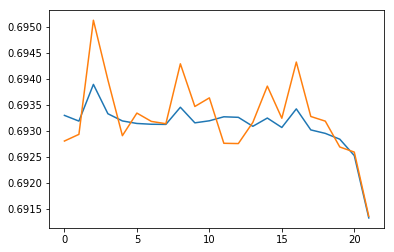

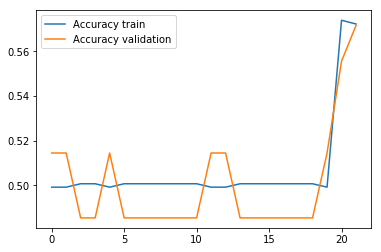

In [7]:
import Tools.Visualization as V
V.plots(nll_train, nll_valid, acc_train, acc_valid)

### Confusion Matrix

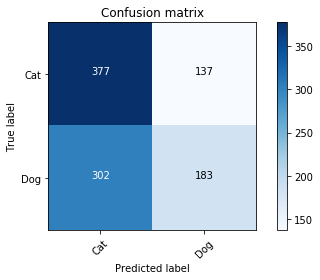

In [8]:
cnf_matrix = trainer.confusion_matrix()
V.plot_confusion_matrix(cnf_matrix)

## Generate Submission

In [9]:
import Tools.Trainer as T
results = T.predict_test_set(model, test_loader)
T.generate_submission(results)

Done...


## Saving the model

In [11]:
torch.save(model, "./Experiments/VanilaCNN-25-0.01")